# Week 3 Assignment
This Jupyter Notebook is submitted as part of the Applied Data Science Capstone Course (IBM & Coursera).

### 3.5 Expected Outcomes and Hypotheses
This section serves to formulate some hypotheses and anticipate potential problems with the final feature set that was created. To review, the final features set has 116,376 rows of observations equally balanced between property damage only (class 1) and injury collisions (class 2), which is still a good amount despite the reduction from RUS. However, since many columns in the original dataset were categorical, transforming them into dummies has resulted in a total of 28 features for analysis, 26 of which are dummy features. While supervised ML algorithms, both regression and classification, should be able to handle big datasets with a large number of features, they perform better when most of those features are continuous variables. Moreover, some of these dummy features have a significant amount of observations listed under 'unknown' or 'other'. In case such categories turn out to have significant importance in the classification process, there is no means to alleviate these 'unknown' conditions to improve traffic safety. For future research on this subject, it is advised to quantify as many variables as possible during the survey. For instance, to replace `WEATHER` with the amount of precipitation and the windspeed; or to develop a scoring system for `ROADCOND` on scale from 1 to 10 (1 being the worst road conditions and 10 being the best).

Ideally, to improve the traffic safety on the streets of Seattle, the classification models should highlight either features that can be influenced or be warned about by authorities. Features that can be influenced by authorities to reduce class 1 and class 2 collisions include human behavior variables. For instance, `SPEEDING` and `UNDERINFL` already represent violation of traffic laws and are already policed. They make for easy policy-levers. Furthermore, traffic authorities can employ a system of electronic traffic signs to warn commuters about sudden changes in `ROADCOND` and `WEATHER` as well as generally remind commuters to drive carefully (`INATTENTIONIND` or `WEEKEND`). Thus, the classification model is hypothesized to be a function of reckless human behavior and adverse driving conditions, for it to find significant options for road safety improvement measures. However, the opposite outcome would be that the classification models produce low accuracy scores on these features and reveal that adverse conditions do not lead to worse collisions. This could be cautiously interpreted as good news because existing measures to improve road safety have reduced the influence of adverse conditions on collision severity, but better data (as defined before) should be collected to produce more accurate results.

## 4. Modelling 
In machine learning, classification is considered supervised learning, which means learning where the class-labels are already given in the dataset. It can be binary or multi-class classification.  Since there are only two classes of accident severity given, this report will develop binary classification models. The assumption is that the permutation or combination of all independent features in the dataset will have recurring patterns that ‘predict’ the classes. The classification algorithm will find the common pattern of combinations that correspond to either one of the dependent classes. This has many applications in various fields of business and science ranging from spam, fraud, or churn prediction over handwriting- and face-recognition towards extreme event prediction and medical diagnosis. Common classification algorithms include: 
- K-Nearest Neighbors,
- Decision Tree,
- Random Forrest,
- Logistic Regression,
- Artificial Neural Networks.

For modelling and evaluation, dataset will be split into a training and a testing subset. The classification algorithm is trained to find the underlying pattern that predicts the classes only from the training subset, while the testing subset simulates out-of-sample accuracy testing. Since there are no means of anticipating how different ML algorithms perform on a given dataset, data scientists use this as form of controlled experiment in order to discover which algorithm and which hyperparameter result in the most accurate classification model. Therefore, several classification algorithms will be modelled and tested to determine the most appropriate model for predicting collision severity on Seattle’s streets.

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use(['ggplot'])

In [2]:
# import Feature Set
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


df_data_1 = pd.read_csv(body)
df_data_1.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,INATTENTIONIND,UNDERINFL,LIGHTCOND,SPEEDING,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,...,Sleet/Hail/Freezing Rain,Snowing,Unknown Weather,Dry,Ice,Oil,Sand/Mud/Dirt,Unknown Roadcond,Wet,WEEKEND
0,2,-122.323148,47.703140,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,-122.334540,47.607871,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,-122.334803,47.604803,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,-122.306426,47.545739,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# final feature set imported with IBM Watson
# cells with sensitive has been deleted
df = df_data_1
df.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,INATTENTIONIND,UNDERINFL,LIGHTCOND,SPEEDING,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,...,Sleet/Hail/Freezing Rain,Snowing,Unknown Weather,Dry,Ice,Oil,Sand/Mud/Dirt,Unknown Roadcond,Wet,WEEKEND
0,2,-122.323148,47.703140,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,-122.334540,47.607871,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,-122.334803,47.604803,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,-122.306426,47.545739,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# package for dataset balancing tools
!conda install -c conda-forge imbalanced-learn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    joblib-0.16.0              |             py_0         203 KB  conda-forge
    scikit-learn-0.23.2        |   py36h0573a6f_0         6.9 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                

In [6]:
#import pre-processing libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
# balancing the dataset
x = df[['LONGITUDE', 'LATITUDE', 'INATTENTIONIND', 'UNDERINFL',
       'LIGHTCOND', 'SPEEDING',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Unknown Weather', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt',
       'Unknown Roadcond', 'Wet', 'WEEKEND']] 
y = df['SEVERITYCODE']

RUS = RandomUnderSampler(random_state=12) # random_state sets the seed which can be used for reproducible results
x_resampled, y_resampled = RUS.fit_resample(x, y)
print(y_resampled.value_counts())

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64


In [8]:
# data normalization
x_prp= preprocessing.StandardScaler().fit(x_resampled).transform(x_resampled)
x_prp[0:2]

array([[-0.46421251,  0.41141912, -0.43802301, -0.2322077 , -0.74932378,
        -0.23419446, -0.10331173, -0.75620201, -0.2410359 , -0.36811486,
         1.10458636, -0.03019389, -0.01709508, -1.24491472, -0.05500191,
        -0.41069259,  2.15641907, -0.01096878, -0.02382119, -0.06462431,
        -0.25868133, -1.44716393, -0.10172836, -0.01877313, -0.0205238 ,
        -0.25070453,  1.71819197,  1.73169368],
       [ 0.18085557, -0.40966943, -0.43802301, -0.2322077 , -0.74932378,
        -0.23419446, -0.10331173, -0.75620201, -0.2410359 , -0.36811486,
         1.10458636, -0.03019389, -0.01709508,  0.80326787, -0.05500191,
        -0.41069259, -0.46373175, -0.01096878, -0.02382119, -0.06462431,
        -0.25868133,  0.69100672, -0.10172836, -0.01877313, -0.0205238 ,
        -0.25070453, -0.58200714, -0.57746934]])

In [9]:
# train-test splitting
x_train, x_test, y_train, y_test = train_test_split(x_prp, y_resampled, test_size=0.2)
print("Train set shape: ", x_train.shape, y_train.shape)
print("Test set shape: ", x_test.shape, y_test.shape)

Train set shape:  (93100, 28) (93100,)
Test set shape:  (23276, 28) (23276,)


### 4.1 K-Nearest Neighbors (KNN)
K-Nearest Neighbors is a comparatively simple classification algorithm that stores all available cases and classifies a new case based on a similarity to its ‘nearest neighbors’. For instance, if an unknown case is compared to 5 neighboring cases and 3 out of 5 of those neighbors are class 2 while the rest are class 1, the unknown case will be classified as class 2. The distance between cases is usually measured by a standard mathematical formula for distances between points in multidimensional planes (e.g. Minkowski distance, which is also employed here).  KNN models work best when the dataset is balanced and its features have been normalized. The challenge in building an accurate KNN model lies in determining the value of K, namely the numbers of neighbors for comparison. A too small k-value may capture too much noise, while increasing it endlessly will run into diminishing marginal gains for accuracy. Given the large feature set of the training data, this challenge is approached by iterating through the integers 15 to 24 and comparing them against their respective mean accuracy (see graph below). The best mean accuracy is achieved at approximately 0.6060 with k equaling 23. A full evaluation of model performances will be given in the next chapter.

In [14]:
# finding a good K for the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(15,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.60014607,
       0.59709572, 0.60169273, 0.59950163, 0.60272384, 0.60083348,
       0.60560234, 0.60444234, 0.60603196, 0.60577419])

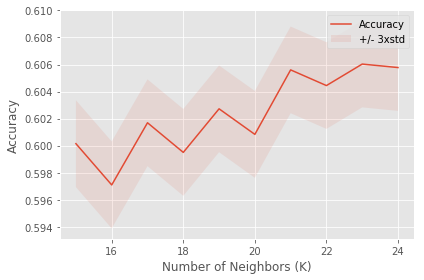

The best general accuracy was at 0.6060319642550266 with k= 23


In [15]:
# Visualize k-value over accuracy
plt.plot(range(15,Ks),mean_acc[14:25])
plt.fill_between(range(15,Ks),mean_acc[14:25] - 1 * std_acc[14:25],mean_acc[14:25] + 1 * std_acc[14:25], alpha=0.10)

plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best general accuracy was at", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [16]:
# build final KNN model
k=23
KNN= KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
y_hat = KNN.predict(x_test)

# full evalution
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

acc1=metrics.accuracy_score(y_test, y_hat)
jc1=jaccard_score(y_test, y_hat)
fs1=f1_score(y_test, y_hat, average='weighted')

### 4.2 Decision Tree
Decision Tree classifier is another of predictive modelling approach in machine learning. The Decision Tree iterates through the features about a case (represented in the branches) to conclusions about the case’s target value (represented in the leaves). In Decision Trees, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. The criterion by which branches eventually lead to pure leaves, where 100% of its cases fall into a single class is called ‘entropy’.  Entropy describes the amount of information disorder, if the sample of cases in a node is completely homogenous (i.e. 100% a single class), then the entropy equals 0. If the sample of cases in a node is completely heterogenous (i.e. split 50-50 between the 2 classes), then entropy equals 1.

This process is illustrated below with Decision Tree that has been given a maximum depth of 4 (see tree diagram). 

Without a maximum depth, the Decision Tree algorithm will run until all leaves have become are pure. This has led to a general accuracy score of 0.5719 on the given feature set for predicting severity classes of collisions. The advantages of Decision Trees are that they work well with categorical data and are easy to interpret (as they mirror human decision making). There disadvantages are that they can become overly complex quickly and small changes in the training data can upset their whole structure.

In [17]:
# understanding decision tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="entropy", max_depth=4)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
# packages for visualizing decision trees
!pip install graphviz
!pip install pydotplus

     |████████████████████████████████| 286kB 8.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


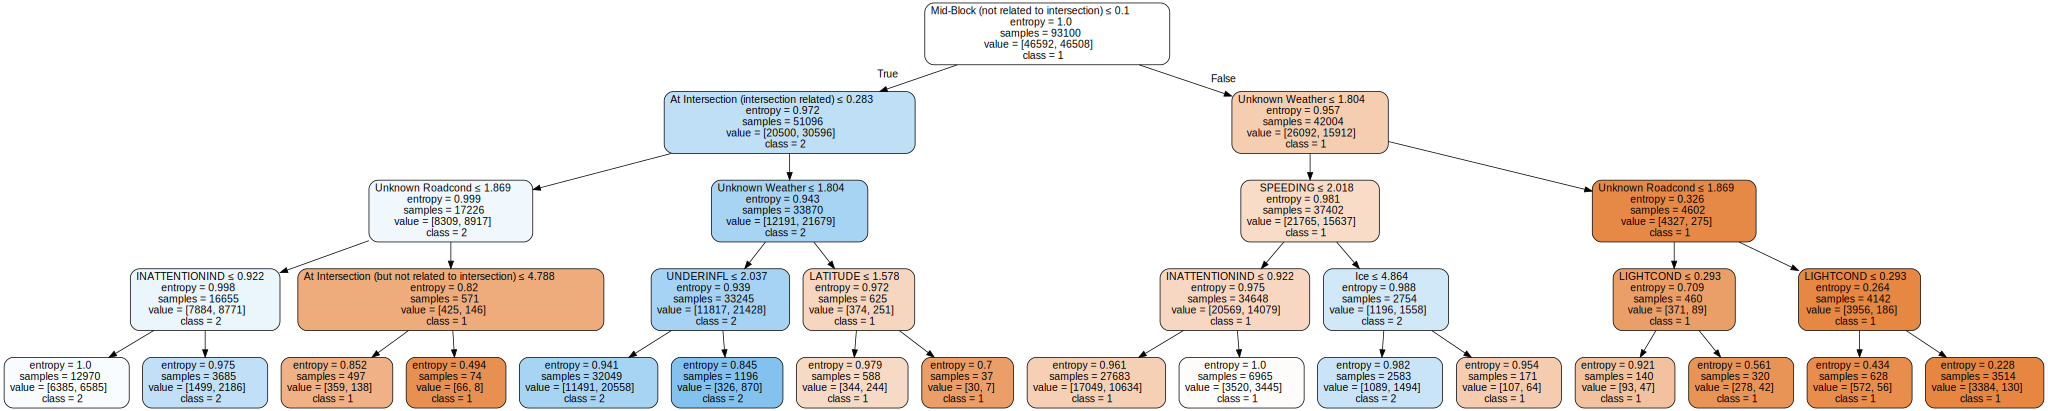

In [20]:
# visualizing decision tree
import pydotplus
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(DTC,
                                out_file=None, 
                                feature_names=x.columns,  
                                class_names=np.unique(y).astype('str'),  
                                filled=True,
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [21]:
# build full decision tree classifier
DTC = DecisionTreeClassifier(criterion="entropy")
DTC.fit(x_train, y_train)

y_hat = DTC.predict(x_test)
print("Decision Tree General Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))

Decision Tree General Accuracy Score:  0.571919573809933


In [22]:
# full evaluation
acc2=metrics.accuracy_score(y_test, y_hat)
jc2=jaccard_score(y_test, y_hat)
fs2=f1_score(y_test, y_hat, average='weighted')

### 4.3 Random Forest
The Random Forrest improves on the advantages and disadvantages of Decision Trees. It is called Random Forest because it operates by constructing a multitude of Decision Trees on various, random sub-samples of the dataset and then outputs the class that is the mode of the classes.  The number of trees in the forest is set to 100 and the criterion to 'entropy' ensure the same method of information gain is used as before. Overall, the Random Forrest produced attained a general accuracy of 0.5870, slightly higher than that of single Decision Tree. Fortunately, this means that the previous Decision Tree model was very close to the precision of the Random Forrest, but inversely this suggests that a much higher accuracy with both these models cannot be attained on the current training dataset.

In [23]:
# build random forest classifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100, criterion="entropy")
RFC.fit(x_train, y_train)

y_hat = RFC.predict(x_test)

# full evaluation
acc3=metrics.accuracy_score(y_test, y_hat)
jc3=jaccard_score(y_test, y_hat)
fs3=f1_score(y_test, y_hat, average='weighted')
print("Random Forest General Accuracy: ", acc3)

Random Forest General Accuracy:  0.5870854098642379


Another crucial ability of Random Forest is 'feature importance scoring' (see bar graph below).  The higher a feature is scored, the more important the feature is in the total reduction of entropy and thus finding pure leaves (the total score must equal 1). By far, the two most important features in predicting collision severity on Seattle’s streets are the continuous variables `LATITUDE` and `LONGUTIDE`. At much lower importance, they are followed by whether a collision happens either `At Interaction (Intersection related)` or happens `Mid-Block (not related to intersection)`. On place four and five of importance scoring are `Unknown Roadcond` and `Unknown Weather` (features that cannot be translated into actions for improving traffic safety). Other features such as `WEEKEND, LIGHTCOND, INATTENTION, SPEEDING,` and others that could be turned into actionable insights for improving traffic safety, have an almost insignificant importance score in predicting collision severity. This confirms the apprehensions about the large size of the feature set and the large number of dummy variables as postulated in section 3.5. The implications of this ranking in feature importance will also be discussed in the next chapters.

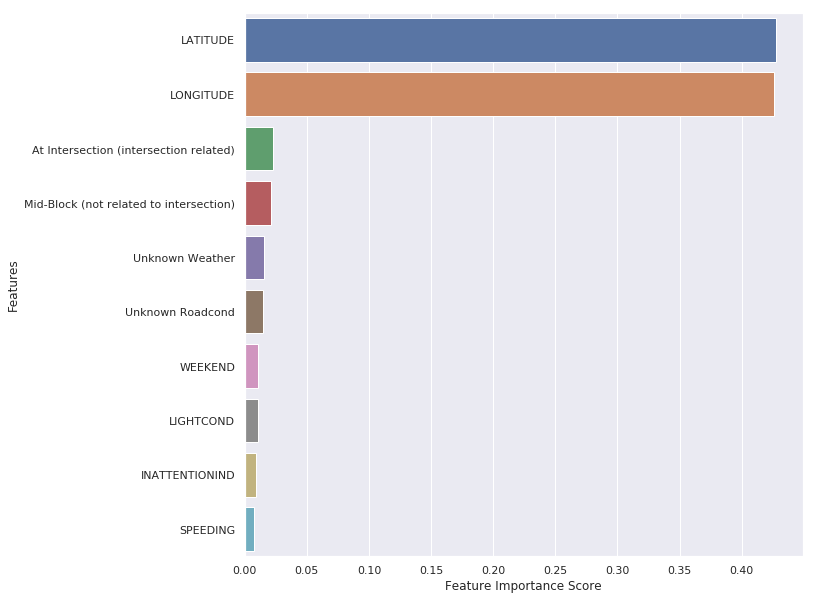

In [24]:
# visualizing feature importance top 10
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,10)})

feature_imp = pd.Series(RFC.feature_importances_, index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

### 4.4 Logistic Regression
In statistics and machine learning, Logistic Regression is employed not only to model binary classification as pass/fail, win/lose, or healthy/sick, but also the probability of a case falling into either class. Logistic Regression analysis is an alternative method to linear regression. Whereas linear regression tries to predict a continuous outcome by finding a linear equation, Logistic Regression does not look at the relationship between target and features as a straight line. Instead, Logistic Regression uses the natural logarithm function to find the relationship among the features that separate the targets into classes. In order to minimize the error of fitting this function to the training dataset, several solvers can be used such as `liblinear, SAG,` and `SAGA`.

`Liblinear` is a library for large linear classification that support logistic regression and linear support vector machines.  A linear classifier model works by making a classification based on the value of the linear combination of the feature values. `Liblinear` is recommended for large-scale and high-dimension datasets, same as is given here. It uses coordinate descent which successively approximates minimization. Stochastic Average Gradient or `SAG` minimizes the sum of error on a smooth convex line. It is also considered a fast solver for large datasets, when both the number of samples and the number of features are high.  The `SAGA` solver is a variant of `SAG` that supports the non-smooth error minimization. It is recommended for multi-class classification.  All solvers also need regularization parameter C (to prevent over-fitting). The value of C is inverse to its regularization strength; i.e. smaller values specify stronger regularization.

In [26]:
# build logistic regression "liblinear"
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train,y_train)

y_hat = LR.predict(x_test)
print("Logistic Regression (liblinear) General Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Logistic Regression (liblinear) General Accuracy:  0.6200378071833649


In [27]:
# build logistic regression "sag"
LR = LogisticRegression(C=0.01, solver='sag')
LR.fit(x_train,y_train)

y_hat = LR.predict(x_test)
print("Logistic Regression (sag) General Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Logistic Regression (sag) General Accuracy:  0.6199948444749958


In [28]:
# build logistic regression "saga"

LR = LogisticRegression(C=0.01, solver='saga')
LR.fit(x_train,y_train)

y_hat = LR.predict(x_test)
print("Logistic Regression (saga) General Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Logistic Regression (saga) General Accuracy:  0.6199948444749958


Despite applying different solvers to the training data in order to classify collision severity, all three Logistic Regression models have attained an identical general accuracy score around 0.62. As the `Liblinear` solver seems the most appropriate for the type of dataset that is given here, it will be used for the full evaluation later. Additionally, since Logistic Regression can also estimate probability of class, it will also be included in the full evaluation.

In [29]:
# full evaluation
from sklearn.metrics import log_loss

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train,y_train)
yhat_prob = LR.predict_proba(x_test)

acc4=metrics.accuracy_score(y_test, y_hat)
jc4=jaccard_score(y_test, y_hat)
fs4=f1_score(y_test, y_hat, average='weighted')
ll4=log_loss(y_test, yhat_prob)

### 4.5 Artificial Neural Network
An Artificial Neural Network is constituted of nodes that are called artificial neurons, which loosely mirror the neurons in a biological brain. Each connection between nodes, like the synapses in a biological brain, can transmit a signal to other neurons. In Neural Networks (NNs), neurons receive a number of signals or input data, they perform some mathematical function on that data, and then output a signal to the next neuron. To transfer their signal outputs to other neurons, neurons have connections named edges and neurons are aggregated into layers. Signals can traverse from the first layer to the last layer multiple times and thus also recreate the feedback mechanism of biological neurons.

![image](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg "Artificial Neural Network Structure")

An NN classifier trains itself by iterating through the original input data and comparing the final output (i.e. the prediction) with a given target label.  As for any other ML algorithm, the difference between predicted and true label is the error. With successive iterations through the data, the NN adjusts the functions of neurons and layers, which will cause the NN to converge on predicted outputs with minimal difference to the true target. Here, the number of iterations is set at 200 and solver is set for `adam`.  Similar to Logistic Regression, NN can also estimate the probability of a case falling into a dependent class. The general accuracy score attained by artificial NN is 0.6243.

In [31]:
# build neural network classifier
from sklearn.neural_network import MLPClassifier
NNC = MLPClassifier(max_iter=200, solver='adam')
NNC.fit(x_train, y_train)
y_hat = NNC.predict(x_test)

# full evaluation
yhat_proba = NNC.predict_proba(x_test)

acc5=metrics.accuracy_score(y_test, y_hat)
jc5=jaccard_score(y_test, y_hat)
fs5=f1_score(y_test, y_hat, average='weighted')
ll5=log_loss(y_test, yhat_proba)

print("Artificial NN General Accuracy:", acc5)

Artificial NN General Accuracy: 0.6243770407286475


## 5. Evaluation
### 5.1 Formal Evaluation Metrics
Various evaluation metrics can be used to assess and compare the performance of the ML classification models developed in the previous chapter. All accuracy scores in tables below are obtained by testing the models on the previously created testing subset to simulate their performance on out-of-sample cases. The simplest accuracy score, titled General Accuracy before, is the number of all correct predictions over the total number of samples. It also can be read as the percentage of how many predictions were correct of all prediction that were made. All classification models tested have an average General Accuracy score 60.2% and they all fall within one standard deviation of 2.2%. Except for the Decision Tree, which is within 2 standard deviations below the mean, illustrating the worst performing model in terms of General Accuracy.

The Jaccard Score, also known as Jaccard similarity coefficient is a metric for calculating the dissimilarity between two sample sets, i.e. the predicted classes and the actual classes. The Jaccard Score is defined as the size of the intersection divided by the size of the union of the two sample sets. It can also be read as percentage; the higher the values, the higher the overlap between the samples. The classification models developed have an average Jaccard score of 42.5% and fall within one standard deviation of 1.8%, except for the NN. The NN is within 2 standard deviations above the mean, showing  better performance than the other models in terms of Jaccard Score

While the General Accuracy and Jaccard-Score are relatively simple metrics of hit or miss, the F1-Score is more sophisticated accuracy measure because it measures the balance between true positive and false positives.  The F1-score is the harmonic mean of the precision and recall (ranging between 0 for worst and 1 for best). Precision is the number of true positive results divided by the number of all positive results, including false positives. Recall is the number of true positive results divided by the number of all samples that should have been identified as positive. 3 out of 5 classification models fall within one standard deviation of the mean of 0.602. Again, the decision tree performed worse (within 2 standard deviations below the mean), while the artificial NN performed best (within 2 standard deviations above the mean).

Logistic Regressions and artificial NNs can estimate the probability of a case falling in either of the dependent classes on top of their binary classification capabilities. A common metric the assess the uncertainty of the predicted probabilities is logistic loss (also called cross-entropy loss), abbreviated as Log-Loss. Log-Loss scores read in the opposite direction as the previous accuracy metrics. For any given problem, a lower Log-Loss value means better predictions as it means lower uncertainty. The NN model did slightly better than the Logistic Regression model by a difference of 0.002 in terms of Log-Loss.


In [32]:
# build a report table
list_acc = [acc1, acc2, acc3, acc4, acc5]
list_jc = [jc1, jc2, jc3, jc4, jc5]
list_fs = [fs1, fs2, fs3, fs4, fs5]
list_ll = [np.NaN, np.NaN, np.NaN, ll4, ll5]

# fomulate the report format
df = pd.DataFrame(list_acc, index=['K-Nearest Neighbor','Decision Tree','Random Forest','Logistic Regression','Neural Network'])
df.columns = ['General Accuracy']
df.insert(loc=1, column='Jaccard-Score', value=list_jc)
df.insert(loc=2, column='F1-score', value=list_fs)
df.insert(loc=3, column='Log-Loss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,General Accuracy,Jaccard-Score,F1-score,Log-Loss
K-Nearest Neighbor,0.606032,0.414656,0.605196,NaN
Decision Tree,0.571920,0.411111,0.571595,NaN
Random Forest,0.587085,0.410946,0.587052,NaN
Logistic Regression,0.619995,0.440933,0.619862,0.643860
Neural Network,0.624377,0.447345,0.624300,0.640896


In [33]:
df.describe()

Algorithm,General Accuracy,Jaccard-Score,F1-score,Log-Loss
count,5.000000,5.000000,5.000000,2.000000
mean,0.601882,0.424998,0.601601,0.642378
std,0.022181,0.017682,0.022213,0.002096
min,0.571920,0.410946,0.571595,0.640896
25%,0.587085,0.411111,0.587052,0.641637
50%,0.606032,0.414656,0.605196,0.642378
75%,0.619995,0.440933,0.619862,0.643119
max,0.624377,0.447345,0.624300,0.643860


### 5.2 Best Classifier and Best Determinants of Collision Severity?

In conclusion, the artificial NN performs best in all evaluation categories. However, it is not a winner by a magnitude only by a margin. There is very little overall variation in the performance of all models and no single model significantly standouts as better, despite their very different approaches. This confirms the negative rather than the positive apprehensions formulated in section 3.5 about the lack of numerical features and abundance of dummy ones. To recall, the classification model was hypothesized to be a function where reckless human behavior and adverse driving conditions increase the severity of collisions. The abundance of dummy features has led to only moderate accuracy for all models. Moreover, the feature importance scoring has demonstrated that most conditions -that would make good policy-levers for improving traffic safety- had almost no significance in determining the classification of severity (see section 4.3). Ultimately, the top three best models for predicting collision severity on the streets of Seattle have been:
1.	Artificial Neural Networks
2.	Logistic Regression
3.	K-Nearest Neighbors 